In [1]:
# name                   :英文名
# japanese_name          :日文名
# pokedex_number         :宝可梦编号
# percentage_male（雄性比）: The percentage of the species that are male. Blank if the Pokemon is genderless.（存在缺失）
# type1                  :主属性
# type2                  :副属性（存在缺失）
# classfication         :归属类别
# height_m               :身高(m)（存在缺失）
# weight_kg              :体重(kg)（存在缺失）
# capture_rate           :捕捉几率
# base eggsteps（破蛋步数）: The number of steps required to hatch an egg of the Pokemon
# abilities              :能力
# experience_growth（经验值）: The Experience Growth of the Pokemon
# base_happiness         :基础幸福值
# against_?（相克性能）  :对18种不同类型的精灵伤害加成比例
# hp                     :基础血量
# attack                 :基础攻击力
# defense                :基础防御力
# sp_attack              :基础特殊攻击值
# sp_defense             :基础特殊防御值
# speed                  :基础移动速度
# generation             :所属代
# is_legendary           :是否为传说级别
# total_point（评分）
# 773行 capture_rate列 '30 (Meteorite)255 (Core)'，这个精灵叫“小陨星”有带外壳和不带外壳两种状态

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 导入宝可梦数据集
df = pd.read_csv(r"D:\TianChi_DataSet\pkmong\pokemon0820.csv")

In [4]:
# 查看各项缺失值比例
missing_rate = df.isnull().sum() * 100 / 801
missing_df = pd.DataFrame({'column_names':df.columns,
                          'missing_rate':missing_rate})
missing_df.sort_values(by='missing_rate', ascending=False).head()

# 发现约48%的小精灵缺失第二属性，即52%的小精灵只有一个属性

,column_names,missing_rate
type2,type2,47.940075
percentage_male,percentage_male,12.234707
weight_kg,weight_kg,2.496879
height_m,height_m,2.496879
name,name,0.000000


In [6]:
df['classfication'].value_counts()

Dragon Pokémon          8
Mushroom Pokémon        6
Mouse Pokémon           6
Fox Pokémon             5
Balloon Pokémon         5
                       ..
Grass Monkey Pokémon    1
Curlipede Pokémon       1
Guts Pokémon            1
Alpha Pokémon           1
Stump Pokémon           1
Name: classfication, Length: 588, dtype: int64

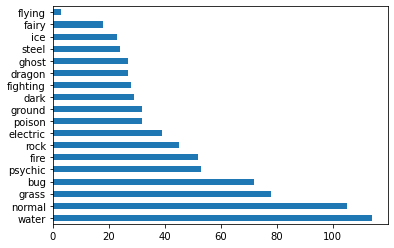

In [7]:
# 仅按主属性分类
df['type1'].value_counts().plot.barh()

# 发现“水属性”，“一般属性”，“草属性”和“虫属性”这四类的小精灵数量遥遥领先

In [8]:
# 各代平均基础攻击力
attack = []
for i in range(1,8):
    x = len(df[df['generation']==i].index)
    attack.append(df[df['generation']==i]['attack'].sum() // x)
    print('第',i,'代，平均基础攻击力：',df[df['generation']==i]['attack'].sum() / x)

第 1 代，平均基础攻击力： 74.52980132450331
第 2 代，平均基础攻击力： 69.96
第 3 代，平均基础攻击力： 77.18518518518519
第 4 代，平均基础攻击力： 82.67289719626169
第 5 代，平均基础攻击力： 80.5576923076923
第 6 代，平均基础攻击力： 76.52777777777777
第 7 代，平均基础攻击力： 84.6375


In [9]:
# 各代平均基础血量
hp = []
for j in range(1,8):
    x = len(df[df['generation']==j].index)
    hp.append(df[df['generation']==j]['hp'].sum() // x)
    print('第',j,'代，平均基础血量：',df[df['generation']==j]['hp'].sum() / x)

第 1 代，平均基础血量： 64.34437086092716
第 2 代，平均基础血量： 70.98
第 3 代，平均基础血量： 65.66666666666667
第 4 代，平均基础血量： 73.10280373831776
第 5 代，平均基础血量： 70.31410256410257
第 6 代，平均基础血量： 71.11111111111111
第 7 代，平均基础血量： 70.575


In [10]:
# 各代平均基础防御力
defense = []
for k in range(1,8):
    x = len(df[df['generation']==k].index)
    defense.append(df[df['generation']==k]['defense'].sum() // x)
    print('第',k,'代，平均基础防御力：',df[df['generation']==k]['defense'].sum() / x)

第 1 代，平均基础防御力： 70.0794701986755
第 2 代，平均基础防御力： 71.79
第 3 代，平均基础防御力： 72.63703703703703
第 4 代，平均基础防御力： 76.16822429906541
第 5 代，平均基础防御力： 71.96153846153847
第 6 代，平均基础防御力： 73.55555555555556
第 7 代，平均基础防御力： 78.0125


In [11]:
# 各代平均基础速度
speed = []
for k in range(1,8):
    x = len(df[df['generation']==k].index)
    speed.append(df[df['generation']==k]['speed'].sum() // x)
    print('第',k,'代，平均基础移速：',df[df['generation']==k]['speed'].sum() / x)

第 1 代，平均基础移速： 70.1523178807947
第 2 代，平均基础移速： 61.61
第 3 代，平均基础移速： 63.577777777777776
第 4 代，平均基础移速： 70.07476635514018
第 5 代，平均基础移速： 66.51923076923077
第 6 代，平均基础移速： 66.65277777777777
第 7 代，平均基础移速： 64.0375


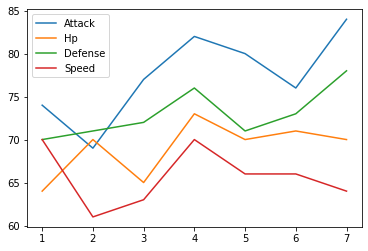

In [12]:
# 攻击力折线图
x = range(1,8)
plt.plot(x, attack, label='Attack')
plt.plot(x, hp, label='Hp')
plt.plot(x, defense, label='Defense')
plt.plot(x, speed, label='Speed')
plt.legend()
plt.show()

# 各代平均攻击力，防御力，血量，速度 四项影响战斗关键属性绘图
# 观察发现好像第四代，第七代的综合属性很高，下面继续探究

In [55]:
# 传奇宝贝种类占比仅8.75%
df['is_legendary'].sum()*100/800

8.75

In [15]:
# 上面四项属性数值总和
z = pd.Series(attack)+pd.Series(hp)+pd.Series(defense)+pd.Series(speed)
z

0    278
1    271
2    277
3    301
4    287
5    286
6    296
dtype: int64

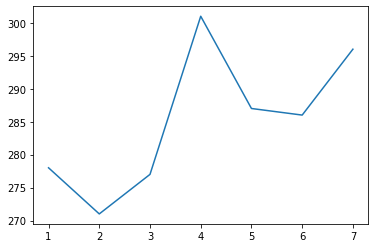

In [16]:
plt.plot(x, z)
plt.show()

# 绘图发现和预期相同，第四代和第七代的属性很高

In [56]:
# 计算四项属性值之和
data1 = df['hp']+df['attack']+df['speed']+df['defense']
data1 = np.array(data1).reshape((1, 801))

In [53]:
df2 = pd.DataFrame(data1, index=df.name, columns=['power'])
df2

,power
name,
Bulbasaur,188
Ivysaur,245
Venusaur,383
Charmander,199
Charmeleon,260
...,...
Celesteela,362
Kartana,480
Guzzlord,420


In [54]:
# 选取属性总和最高的前15种精灵
df2.sort_values(by='power', ascending=False).head(15)

,power
name,
Groudon,530
Zygarde,522
Slaking,510
Rayquaza,500
Salamence,490
Aggron,490
Metagross,485
Garchomp,485
Tyranitar,485


In [74]:
# 从15种精灵中除去传奇宝贝
pd.set_option('display.max_columns',None)
df[(df['name'].isin(['Groudon','Zygarde','Slaking','Rayquaza','Salamence','Aggron','Metagross','Garchomp','Tyranitar','Kartana','Arceus','Regigigas','Solgaleo','Mewtwo','Buzzwole'])) & (df.is_legendary==0)]

# 最终剩下有六种非传奇宝贝，但是属性很高的精灵
# Tyranitar
# Slaking
# Aggron
# Salamence
# Metagross
# Garchomp

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
247,"['Sand Stream', 'Unnerve']",2.0,0.5,1.0,1.0,2.0,4.0,0.5,0.50,0.5,2.00,2.0,1.0,0.50,0.5,0.00,1.0,2.0,2.0,164,10240,35,700,45,Armor Pokémon,150,1250000,2.0,100,Bangirasバンギラス,Tyranitar,50.0,248,95,120,71,rock,dark,202.0,2,0
288,['Truant'],1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.00,0.0,1.00,1.0,1.0,1.00,1.0,1.00,1.0,1.0,1.0,160,3840,70,670,45,Lazy Pokémon,100,1250000,2.0,150,Kekkingケッキング,Slaking,50.0,289,95,65,100,normal,NaN,130.5,3,0
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,1.00,4.0,0.5,0.25,0.0,0.50,0.5,1.0,2.0,140,8960,35,630,45,Iron Armor Pokémon,230,1250000,2.1,70,Bossgodoraボスゴドラ,Aggron,50.0,306,60,80,50,steel,rock,360.0,3,0
372,"['Intimidate', 'Moxie']",0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.00,1.0,0.25,0.0,4.0,1.00,1.0,1.00,2.0,1.0,0.5,145,10240,35,700,45,Dragon Pokémon,130,1250000,1.5,95,Bohmanderボーマンダ,Salamence,50.0,373,120,90,120,dragon,flying,102.6,3,0
375,"['Clear Body', 'Light Metal']",1.0,2.0,0.5,1.0,0.5,1.0,2.0,0.50,2.0,0.50,2.0,0.5,0.50,0.0,0.25,0.5,0.5,1.0,145,10240,35,700,3,Iron Leg Pokémon,150,1250000,1.6,80,Metagrossメタグロス,Metagross,NaN,376,105,110,110,steel,psychic,550.0,3,0
444,"['Sand Veil', 'Rough Skin']",1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.00,1.0,1.00,1.0,4.0,1.00,0.5,1.00,0.5,1.0,1.0,170,10240,70,700,45,Mach Pokémon,115,1250000,1.9,108,Gaburiasガブリアス,Garchomp,50.0,445,120,95,92,dragon,ground,95.0,4,0
